# 05 - Clasificación con Máquinas de soporte vectorial ( Kernel Linear)

In [39]:
from os import O_TRUNC
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image

import prediccion

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from statistics import mean

df = pd.DataFrame(pd.read_csv('mobile_price.csv'))


### Predicciones con el dataset original (Máquinas de soporte vectorial ( Kernel Linear))

In [40]:
from sklearn.svm import SVC
algoPrediccion = prediccion.ClasificacionModelo(df)
algoPrediccion.clasificador =  SVC(kernel = "linear", random_state = 0)
algoPrediccion.df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.20,0,1,0,7,0.60,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.50,1,0,1,53,0.70,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.50,1,2,1,41,0.90,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.50,0,0,0,10,0.80,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.20,0,13,1,44,0.60,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.50,1,0,1,2,0.80,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.60,1,0,0,39,0.20,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.90,1,1,1,36,0.70,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.90,0,4,1,46,0.10,145,5,...,336,670,869,18,10,19,1,1,1,0


In [41]:
algoPrediccion.realizarEntrenamientoCompleto('price_range')

shape X_train (1600, 17)
shape X_test (400, 17)
shape y_train (1600, 1)
shape y_test (400, 1)


In [42]:
algoPrediccion.resultadoDeEntrenamiento()

,Actual,Prediccion,Error Absoluto,Error porcentual absoluto %
0,3,3,0,0.00
1,0,0,0,0.00
2,2,2,0,0.00
3,2,2,0,0.00
4,2,3,1,50.00
...,...,...,...,...
395,1,1,0,0.00
396,1,1,0,0.00
397,0,0,0,0.00
398,2,2,0,0.00


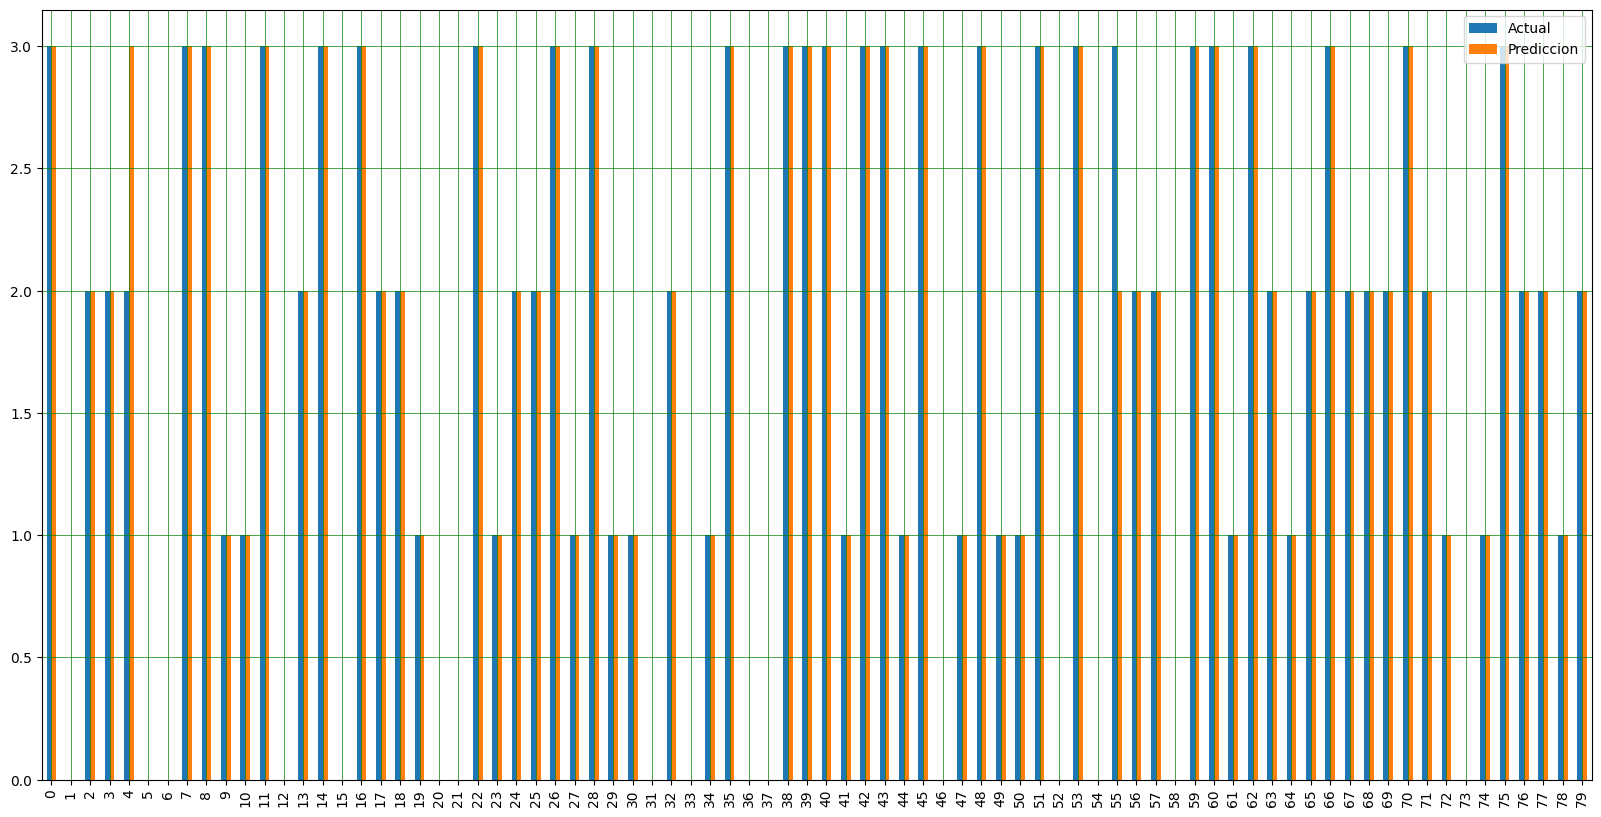

In [43]:
algoPrediccion.graficoComparativoBarras()

A simple vista el grafico de barras muesta que tanto el valor actual y predicho son similares en altura en la mayoria de los casos lo cual es realmente bueno 

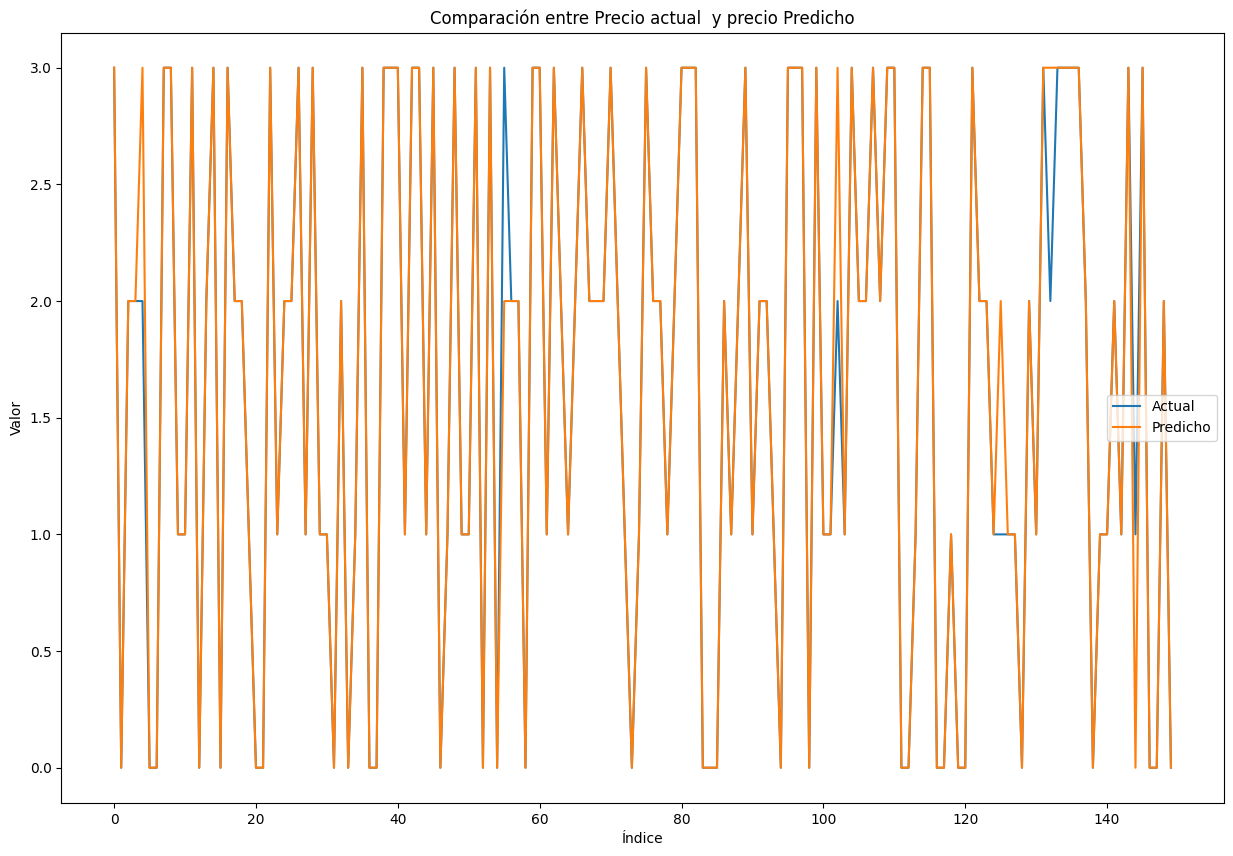

In [44]:
algoPrediccion.graficoComparativoLineas()

Tambien observamos que la linea del rango de precios predicho en general superpone a la linea de precios de rango actual de manera perfecto salvo contadas excepciones. Esto esta dando buenos indicios sobre la prediccion

[[ 94   1   0   0]
 [  2  87   3   0]
 [  0   6  89   4]
 [  0   0   1 113]]


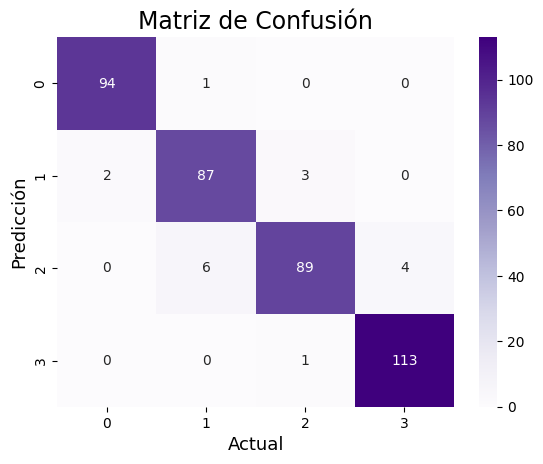

In [45]:
algoPrediccion.graficoMatrizDeConfusion()

In [46]:
algoPrediccion.metricas()

              precision    recall  f1-score   support

           0     0.9792    0.9895    0.9843        95
           1     0.9255    0.9457    0.9355        92
           2     0.9570    0.8990    0.9271        99
           3     0.9658    0.9912    0.9784       114

    accuracy                         0.9575       400
   macro avg     0.9569    0.9563    0.9563       400
weighted avg     0.9575    0.9575    0.9572       400




si observamos  el accuracy vemos que obtuvimos un resultado mejor  que con la regresion logistica (en el cual habiamos obtenido un 0.95 con los datos sin limpiar) dandonos una mejora de 0.075%  (en accuracy ) lo que no es tanto pero aun asi nos deja claro que este algoritmo tuvo en lineas generales un resultado mejor que el de regresion logistica (que hasta este momento estaba siendo el mejor algoritmo para lograr predecir los rangos de precios de los celulares) <br>

Esto significa que el algoritmo logra predecir correctamente el rango de precios de los celulares en la mayoría de los casos, con una tasa de error muy baja del 4% aproximadamente lo cual es muy bueno. Segun las metricas y la matriz de confusion para el rango de precios 1 y 2 se han obtenido los peores resultados pero aun asi es bueno. Tambien estamos viendo que los algoritmos estan teniendo una tasa de fallo mayor para los rangos de precios 1 y 2 en comparacion de 0 y 3 donde estamos obteniendo los mejores resultados. Esto nos indica que habria que hacer una analisis adicional para aquellos celulares de rango de precio 1 y 2 y ver que cosas se podrian corregir en el dataset. Esto ultimo no se va hacer por cuestiones de tiempo y para no extender mucho mas el tp <hr>

### Predicciones con el dataset "limpiado" (Máquinas de soporte vectorial ( Kernel Linear))

Importamos ahora el dataset limpiado y realizamos las pruebas

In [47]:

df_limpio = pd.DataFrame(pd.read_csv('mobile_price_limpiado.csv'))


algoPrediccion2 = prediccion.ClasificacionModelo(df_limpio)
algoPrediccion2.clasificador =  SVC(kernel = "linear", random_state = 0)
algoPrediccion2.realizarEntrenamientoCompleto('price_range')

shape X_train (1408, 17)
shape X_test (353, 17)
shape y_train (1408, 1)
shape y_test (353, 1)


In [48]:
algoPrediccion2.metricas()

              precision    recall  f1-score   support

           0     0.9588    0.9588    0.9588        97
           1     0.9100    0.9381    0.9239        97
           2     0.9737    0.9136    0.9427        81
           3     0.9750    1.0000    0.9873        78

    accuracy                         0.9518       353
   macro avg     0.9544    0.9526    0.9532       353
weighted avg     0.9524    0.9518    0.9518       353



Para este caso tambien el rendimiento empeora pero no es para nada grave. De hecho hay una diferencia demasiado pequeña. Por lo que podemos concluir que el dataset limpio esta relativamente bien adaptado a este algoritmo. Quizas con algunas pruebas adicional se logre incluso mejorar el rendimiento. Aun asi supera los resultados obtenidos (accuracy) en la regresion logistica con los datos sin limpiar pero no asi en el caso de la prediccion con los datos limpiados. Ademas vemos que para el rango de precio 2 se mejora el rendimiento de su prediccion en ese caso particular en un 2% aunque empeora en 1% para el rango numero 1.

<hr> <hr>

# 05(B) - Clasificación con Máquinas de soporte vectorial ( Kernel rbf) 

In [49]:
from sklearn.svm import SVC
algoPrediccion = prediccion.ClasificacionModelo(df)
algoPrediccion.clasificador =  SVC(kernel = "rbf", random_state = 0)
algoPrediccion.df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.20,0,1,0,7,0.60,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.50,1,0,1,53,0.70,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.50,1,2,1,41,0.90,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.50,0,0,0,10,0.80,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.20,0,13,1,44,0.60,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.50,1,0,1,2,0.80,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.60,1,0,0,39,0.20,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.90,1,1,1,36,0.70,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.90,0,4,1,46,0.10,145,5,...,336,670,869,18,10,19,1,1,1,0


In [50]:
algoPrediccion.realizarEntrenamientoCompleto('price_range')

shape X_train (1600, 17)
shape X_test (400, 17)
shape y_train (1600, 1)
shape y_test (400, 1)


In [51]:
algoPrediccion.resultadoDeEntrenamiento()

,Actual,Prediccion,Error Absoluto,Error porcentual absoluto %
0,3,3,0,0.00
1,0,0,0,0.00
2,2,2,0,0.00
3,2,2,0,0.00
4,2,2,0,0.00
...,...,...,...,...
395,1,1,0,0.00
396,1,1,0,0.00
397,0,0,0,0.00
398,2,2,0,0.00


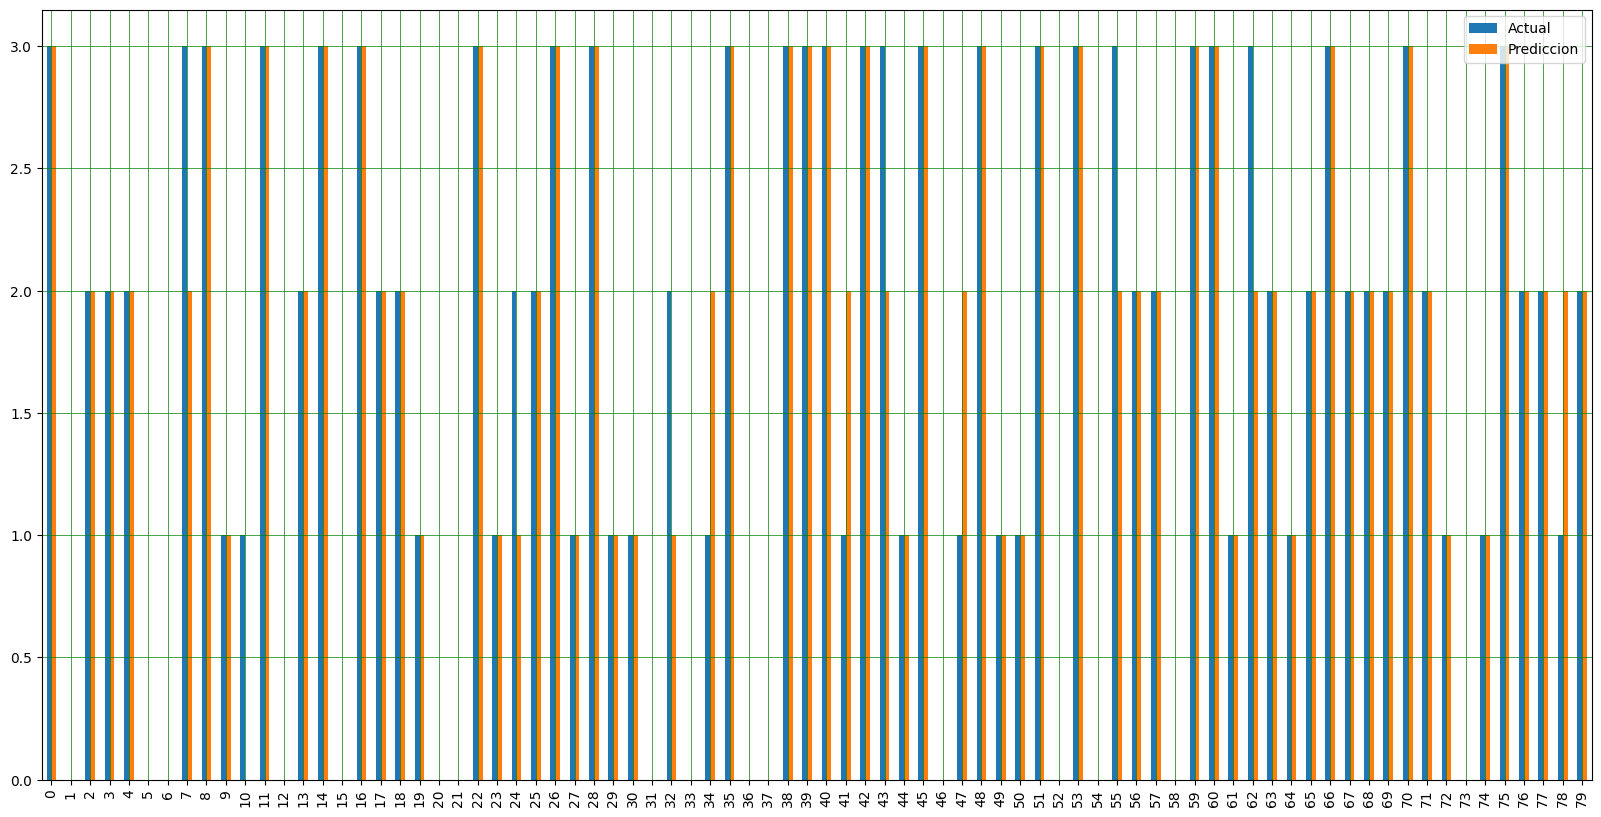

In [52]:
algoPrediccion.graficoComparativoBarras()

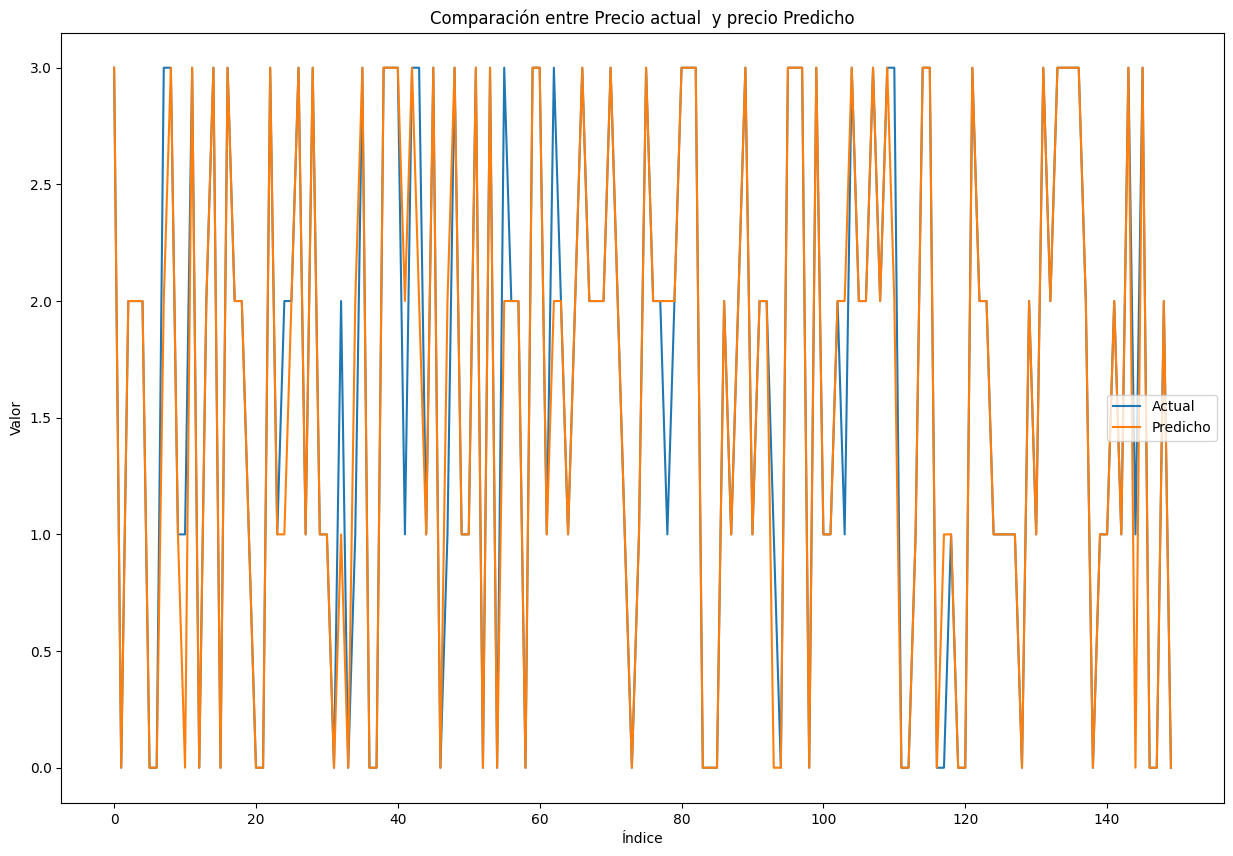

In [53]:
algoPrediccion.graficoComparativoLineas()

[[ 91   4   0   0]
 [  6  77   9   0]
 [  0  10  86   3]
 [  0   0  10 104]]


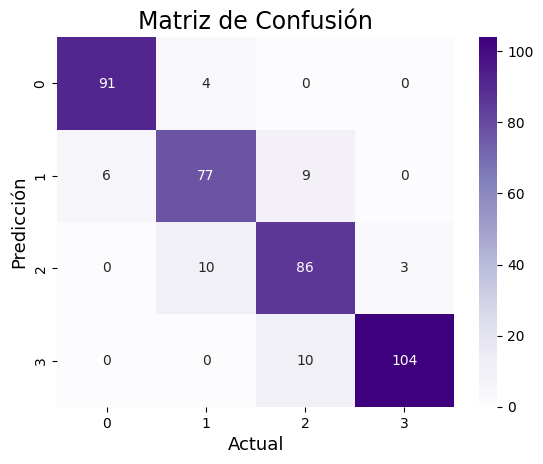

In [54]:
algoPrediccion.graficoMatrizDeConfusion()

In [55]:
algoPrediccion.metricas()

              precision    recall  f1-score   support

           0     0.9381    0.9579    0.9479        95
           1     0.8462    0.8370    0.8415        92
           2     0.8190    0.8687    0.8431        99
           3     0.9720    0.9123    0.9412       114

    accuracy                         0.8950       400
   macro avg     0.8938    0.8940    0.8934       400
weighted avg     0.8971    0.8950    0.8956       400




si observamos  el accuracy vemos que obtuvimos un resultado peor en comparacion con la  regresion logistica (en el cual habiamos obtenido un 0.95 con los datos sin limpiar y 0.97 con los datos limpios) y con la regresion con maquinas vectoriales con el kernel linear el cual nos  habia arrojado los mejores resultados hasta ahora cuando realizamos la predicciones con el data set sin limpiar. Aun asi los resultados demuestran que este algoritmo es mejor que el de KNN.
<br><br>

Los resultados nos demuestran con sus fallos y todo ,  que el algoritmo logra predecir correctamente el rango de precios de los celulares en la mayoría de los casos, con una tasa de error   del 10% aproximadamente lo cual sigue siendo  muy bueno. 
<br><br>

Segun las metricas y la matriz de confusion para el rango de precios 1 y 2 se han obtenido los peores resultados (f1-score) nuevamente  en comparacion de 0 y 3 donde estamos obteniendo los mejores resultados como ya viene pasando con todos los algoritmos hasta ahora .
<hr>

### Predicciones con el dataset "limpiado" (Máquinas de soporte vectorial ( Kernel rbf))

In [56]:
df_limpio = pd.DataFrame(pd.read_csv('mobile_price_limpiado.csv'))


algoPrediccion2 = prediccion.ClasificacionModelo(df_limpio)
algoPrediccion2.clasificador =  SVC(kernel = "rbf", random_state = 0)
algoPrediccion2.realizarEntrenamientoCompleto('price_range')

shape X_train (1408, 17)
shape X_test (353, 17)
shape y_train (1408, 1)
shape y_test (353, 1)


In [57]:
algoPrediccion2.metricas()

              precision    recall  f1-score   support

           0     0.9100    0.9381    0.9239        97
           1     0.8163    0.8247    0.8205        97
           2     0.7922    0.7531    0.7722        81
           3     0.8974    0.8974    0.8974        78

    accuracy                         0.8555       353
   macro avg     0.8540    0.8534    0.8535       353
weighted avg     0.8545    0.8555    0.8548       353



aqui pasa todo lo contrario, el dataset limpiado empeora el rendimiento  en un aproximado de 3% en comparacion con el mismo algoritmos con el mismo kernel por lo que el dataset limpiado no se adapta muy bien que digamos para este algoritmo. Podemos observar incluso que el rango de precios 2 empeora bastante su rendimiento (pierde 5 puntos).


Para este caso tambien el rendimiento no tanto pero aun asi es una diferencia a considerar  por lo que podemos concluir que el dataset limpio no es el ideal para este algoritmo con este kernel (rbf) pero que aun asi se pueden realizar predicciones buenas siempre y cuando estemos dispuesto a aceptar ese 15% de probabilidades de errar con el resultado.



<hr><hr>